# Importing libraries

In [2]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteKDILRE/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteKDILRE/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
ds.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [5]:
iterator = ds.as_numpy_iterator()

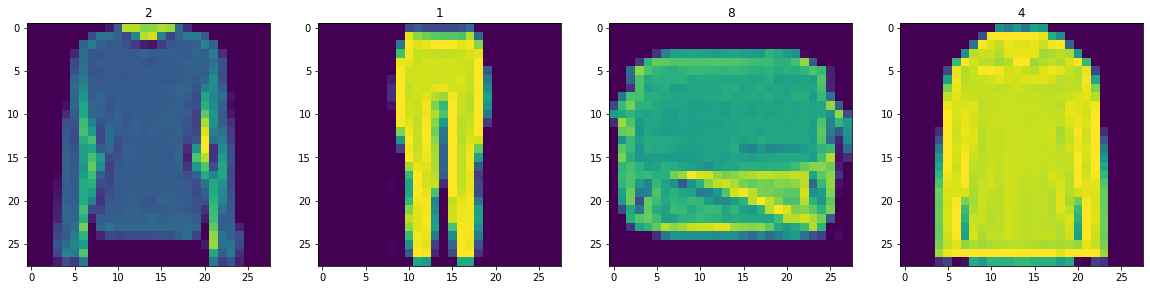

In [6]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for i in range(4):
  batch = iterator.next()
  ax[i].imshow(np.squeeze(batch['image']))
  ax[i].title.set_text(batch['label'])

In [7]:
def scale_images(data):
  image = data['image']
  return image/255

In [8]:
ds = tfds.load('fashion_mnist', split='train')
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [9]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [11]:
def build_generator():
  model = models.Sequential()
  model.add(layers.Dense(7*7*128, input_dim = 128))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Reshape((7,7,128)))

  model.add(layers.UpSampling2D())
  model.add(layers.Conv2D(128,5,padding='same'))
  model.add(layers.LeakyReLU(0.2))

  model.add(layers.UpSampling2D())
  model.add(layers.Conv2D(128,5,padding='same'))
  model.add(layers.LeakyReLU(0.2))

  model.add(layers.Conv2D(128,4,padding='same'))
  model.add(layers.LeakyReLU(0.2))

  model.add(layers.Conv2D(128,4,padding='same'))
  model.add(layers.LeakyReLU(0.2))

  model.add(layers.Conv2D(1,4,padding='same', activation='sigmoid'))

  return model


In [12]:
generator = build_generator()

In [13]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [21]:
img = generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 17ms/step


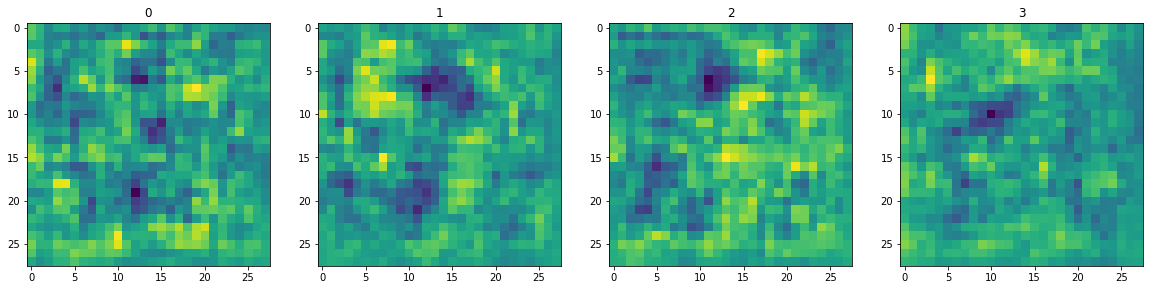

In [15]:
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for i, img in enumerate(img):
  ax[i].imshow(np.squeeze(img))
  ax[i].title.set_text(i)

In [16]:
def build_discriminator():

  model = models.Sequential()
  model.add(layers.Conv2D(32, 5, input_shape=(28,28,1)))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dropout(0.4))

  model.add(layers.Conv2D(64, 5))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dropout(0.4))

  model.add(layers.Conv2D(256, 5))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dropout(0.4))

  model.add(layers.Conv2D(256, 5))
  model.add(layers.LeakyReLU(0.2))
  model.add(layers.Dropout(0.4))

  model.add(layers.Flatten())
  model.add(layers.Dropout(0.4))

  model.add(layers.Dense(1, activation='sigmoid'))

  return model

In [17]:
discriminator = build_discriminator()

In [18]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 256)      

In [19]:
img.shape

(28, 28, 1)

In [22]:
discriminator.predict(img)

1/1 [==============================] - 0s 180ms/step


array([[0.503889 ],
       [0.5039959],
       [0.5038878],
       [0.5038853]], dtype=float32)

In [23]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [24]:
gen_opt = Adam(learning_rate=0.0002)
disc_opt = Adam(learning_rate=0.00001)
gen_loss = BinaryCrossentropy()
disc_loss = BinaryCrossentropy()

In [25]:
from tensorflow.keras.models import Model

In [26]:
class GAN(Model):
  def __init__(self,generator, discriminator, *args, **kwargs):
    super().__init__(*args, **kwargs)
    self.generator = generator
    self.discriminator = discriminator

  def compile(self, gen_opt, disc_opt, gen_loss, disc_loss, *args, **kwargs):
    super().compile(*args, **kwargs)
    self.gen_opt = gen_opt
    self.disc_opt = disc_opt
    self.gen_loss = gen_loss
    self.disc_loss = disc_loss
  
  def train_step(self, batch):
    real_images = batch
    fake_images = self.generator(tf.random.normal((128,128,1)), training=False)

    #Train discriminator
    with tf.GradientTape() as d_tape:
      #Pass real and fake images to discriminator
      real_output = self.discriminator(real_images, training=True)
      fake_output = self.discriminator(fake_images, training=True)
      real_fake_output = tf.concat([real_output, fake_output], axis=0)

      #Create labels for fake and real images
      label_real_fake = tf.concat([tf.zeros_like(real_output), tf.ones_like(fake_output)], axis=0) # discriminator is all about spotting out fake images; 1-> fake || 0-> real

      #Add noice to output so as to make the discriminator learning slow
      noise_real = 0.15*tf.random.uniform(tf.shape(real_output))
      noise_fake = 0.15*tf.random.uniform(tf.shape(fake_output))
      label_real_fake += tf.concat([noise_real, noise_fake], axis=0)

      #Calculate loss
      total_disc_loss = self.disc_loss(label_real_fake, real_fake_output)

    #Backpropagate
    disc_grad = d_tape.gradient(total_disc_loss, self.discriminator.trainable_variables)
    self.disc_opt.apply_gradients(zip(disc_grad, self.discriminator.trainable_variables))

    #Training the generator
    with tf.GradientTape() as g_tape:
      #Generate new images
      gen_images = self.generator(tf.random.normal((128,128,1)), training =True)

      #Create labels
      predicted_labels = self.discriminator(gen_images, training=False)

      #Calculate loss
      total_gen_loss = self.gen_loss(tf.zeros_like(predicted_labels), predicted_labels)
    #Backpropagation
    gen_grad = g_tape.gradient(total_gen_loss, self.generator.trainable_variables)
    self.gen_opt.apply_gradients(zip(gen_grad, self.generator.trainable_variables))

    return {"disc_loss": total_disc_loss, "gen_loss": total_gen_loss}


In [27]:
F_GAN = GAN(generator, discriminator)

In [28]:
F_GAN.compile(gen_opt, disc_opt, gen_loss, disc_loss)

In [29]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [33]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('/content/images', f'generated_img_{epoch}_{i}.png'))

In [34]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [ ]:
  history = F_GAN.fit(ds, epochs=50, callbacks=[ModelMonitor()])

Epoch 1/50
  6/469 [..............................] - ETA: 1:15 - disc_loss: -0.4288 - gen_loss: 17.5601

469/469 [==============================] - 79s 168ms/step - disc_loss: -0.4259 - gen_loss: 17.9866
Epoch 2/50
218/469 [============>.................] - ETA: 42s - disc_loss: -0.4299 - gen_loss: 18.4039

In [ ]:
plt.suptitle('Loss')
plt.plot(history.history['disc_loss'], label='d_loss')
plt.plot(history.history['gen_loss'], label='g_loss')
plt.legend()
plt.show()

In [ ]:
generator.load_weights(os.path.join('archive', 'generatormodel.h5'))

In [ ]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [ ]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')